In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config InlineBackend.figure_formats = ['svg']

df = pd.read_csv('data/vv_capture_2025-06-04_16-23-48/cleaned_verifier_data.csv', converters={'FIPS code': str}).convert_dtypes()

# Non-VVSG equipment
non_voting_equipment = ['Paper Poll Book',
                        'Hand Counted Paper Ballots', 
                        'Commercial Electronic Poll Book',
                        'In-House Electronic Poll Book',
                        'Data Unavailable',
                        'Internet Voting: Email',
                        'Internet Voting: Web Portal',
                        'Internet Voting: Fax',
                        'Remote Ballot Marking System: Client-Side',
                        'Remote Ballot Marking System: Server-Side']

# VVSG equipment
voting_equipment = ['Ballot Marking Device', 
                            'Hand-Fed Optical Scanner',
                            'Batch-Fed Optical Scanner',
                            'DRE-Touchscreen',
                            'DRE-Push Button',
                            'DRE-Dial',
                            'Mechanical Lever Machine',
                            'Punch Card Voting System',
                            'Hybrid BMD/Tabulator',
                            'Hybrid Optical Scan/DRE',
                            'Hybrid Optical Scan/BMD']

# filter only for VVSG relevant equipment
df = df[df['Equipment Type'].isin(voting_equipment)]

# merge DRE categories
df.loc[df['Equipment Type'].str.startswith('DRE'), 'Equipment Type'] = 'DRE'


/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_11563/3305053625.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/vv_capture_2025-06-04_16-23-48/cleaned_verifier_data.csv', converters={'FIPS code': str}).convert_dtypes()


In [224]:
retired = df[df["Final Year in Use"] == True]

retirement_pmf = (
    retired.groupby("Equipment Type")["Years in Use"]
    .value_counts(normalize=True)
    .groupby(level=0)
    .apply(lambda x: x.sort_index())
    .unstack()
)

retirement_pmf.index = retirement_pmf.index.droplevel(level=0)

retirement_pmf = retirement_pmf.fillna(0)
retirement_pmf
# to check understanding of above. it works
# retired[retired['Equipment Type'] == 'DRE']['Years in Use'].value_counts(normalize=True).sort_index()

Years in Use,0,2,4,6,8,10,12,14,16,18,...,24,26,28,30,32,34,38,44,46,54
Equipment Type,,,,,,,,,,,,,,,,,,,,,
Ballot Marking Device,0.07021,0.091529,0.059125,0.032405,0.286811,0.144684,0.156339,0.094656,0.061967,0.002274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Batch-Fed Optical Scanner,0.108046,0.049042,0.072031,0.115709,0.190805,0.15249,0.213793,0.049808,0.015326,0.027586,...,0.000766,0.0,0.0,0.0,0.001533,0.0,0.0,0.0,0.0,0.0
DRE,0.191026,0.017326,0.056641,0.053754,0.110395,0.118614,0.169702,0.212572,0.058418,0.006442,...,0.0,0.0,0.0,0.000222,0.0,0.0,0.0,0.0,0.0,0.0
Hand-Fed Optical Scanner,0.08325,0.07043,0.126374,0.089411,0.078089,0.104895,0.147852,0.125708,0.108891,0.041459,...,0.002664,0.000167,0.0,0.000167,0.0,0.0,0.000167,0.0,0.0,0.0
Hybrid BMD/Tabulator,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hybrid Optical Scan/BMD,0.333333,0.458333,0.125,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mechanical Lever Machine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028986,0.270531,0.700483
Punch Card Voting System,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.384615,0.230769,0.076923,0.153846,0.153846,0.0,0.0,0.0,0.0


In [212]:
retired = df[df["Final Year in Use"] == True]

retirement_cdf = (
    retired.groupby("Equipment Type")["Years in Use"]
    .value_counts(normalize=True)
    .groupby(level=0)
    .apply(lambda x: x.sort_index().cumsum())
    .unstack()
    .fillna(method="ffill", axis=1) # this is appropriate for cumulative replacement odds—it just adds nothing to previous years
)

retirement_cdf.index = retirement_cdf.index.droplevel(level=0)

retirement_cdf
# to check understanding of above. it works
# retired[retired['Equipment Type'] == 'DRE']['Years in Use'].value_counts(normalize=True).sort_index()

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_11563/4051905098.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method="ffill", axis=1) # this is appropriate for cumulative replacement odds—it just adds nothing to previous years


Years in Use,0,2,4,6,8,10,12,14,16,18,...,24,26,28,30,32,34,38,44,46,54
Equipment Type,,,,,,,,,,,,,,,,,,,,,
Ballot Marking Device,0.07021,0.16174,0.220864,0.253269,0.54008,0.684764,0.841103,0.935759,0.997726,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Batch-Fed Optical Scanner,0.108046,0.157088,0.229119,0.344828,0.535632,0.688123,0.901916,0.951724,0.96705,0.994636,...,0.998467,0.998467,0.998467,0.998467,1.0,1.0,1.0,1.0,1.0,1.0
DRE,0.191026,0.208352,0.264993,0.318747,0.429143,0.547757,0.717459,0.930031,0.98845,0.994891,...,0.999778,0.999778,0.999778,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Hand-Fed Optical Scanner,0.08325,0.15368,0.280053,0.369464,0.447552,0.552448,0.7003,0.826007,0.934898,0.976357,...,0.9995,0.999667,0.999667,0.999833,0.999833,0.999833,1.0,1.0,1.0,1.0
Hybrid BMD/Tabulator,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Hybrid Optical Scan/BMD,0.333333,0.791667,0.916667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mechanical Lever Machine,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.028986,0.299517,1.0
Punch Card Voting System,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,0.384615,0.615385,0.692308,0.846154,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Get the year by which 95% of equipment is typically retired, per equipment type
retirement_cutoff_year = retirement_cdf.apply(
    lambda row: row[row >= 0.95].first_valid_index(), axis=1
)
retirement_cutoff_year

Equipment Type
Ballot Marking Device        16
Batch-Fed Optical Scanner    14
DRE                          16
Hand-Fed Optical Scanner     18
Hybrid BMD/Tabulator          2
Hybrid Optical Scan/BMD       6
Mechanical Lever Machine     54
Punch Card Voting System     34
dtype: int64

In [243]:
start_year = 2028 # first year that equipment starts being simulated for possible replacement
end_year = 2040
years = list(range(start_year, end_year + 1, 2))


# Track replacements
df["Simulated Replaced"] = False
df["Simulated Replace Year"] = None

# Copy starting state
# simulation_df = df[df["New Equipment"] == True].copy()
simulation_df = df[df['Year']==2026].copy()
simulation_df = simulation_df.dropna(subset=['First Year in Use'])

# hold results here
equipment_types = simulation_df["Equipment Type"].unique()
coverage_by_year_and_type = pd.DataFrame(index=years, columns=equipment_types, dtype=float)


for year in years:
    simulation_df["Simulated Years in Use"] = year - simulation_df["First Year in Use"]
    
    for eq_type in equipment_types:
        eq_mask = (simulation_df["Equipment Type"] == eq_type) & (~simulation_df["Simulated Replaced"])
        current_eq = simulation_df[eq_mask].copy()
        
        # Get relevant replacement probabilities
        if eq_type not in retirement_pdf.index:
            continue
        
        for idx, row in current_eq.iterrows():
            years_in_use = int(row["Simulated Years in Use"])
            
            # Probability the equipment has been retired by now
            # retirement_prob = retirement_pmf.loc[eq_type].get(years_in_use, 1.0)  # Assume retirement after max known age

            # If the equipment has been in use for longer than the cutoff, it is retired
            cutoff = retirement_cutoff_year.get(eq_type, np.inf)
            if years_in_use >= cutoff:
                retirement_prob = 1.0
            else:
                retirement_prob = retirement_pmf.loc[eq_type].get(years_in_use, 0.0)

            if np.random.rand() < retirement_prob:
                simulation_df.at[idx, "Simulated Replaced"] = True
                simulation_df.at[idx, "Simulated Replace Year"] = year
                simulation_df.at[idx, "First Year in Use"] = year  # reset first year
    
    # Compute VVSG 2.x % coverage
        total = len(simulation_df[simulation_df["Equipment Type"] == eq_type])
        if total > 0:
            covered = simulation_df[(simulation_df["Equipment Type"] == eq_type) & (simulation_df["Simulated Replaced"])].shape[0]
            coverage_by_year_and_type.loc[year, eq_type] = (covered / total) * 100
        else:
            coverage_by_year_and_type.loc[year, eq_type] = np.nan

coverage_by_year_and_type


,Ballot Marking Device,Hand-Fed Optical Scanner,Batch-Fed Optical Scanner,DRE,Hybrid Optical Scan/BMD,Hybrid BMD/Tabulator,Hybrid Optical Scan/DRE
2028,23.649460,15.031171,25.279789,43.961353,97.974414,100.0,NaN
2030,35.354142,26.021704,44.832126,51.207729,100.000000,100.0,NaN
2032,58.823529,41.814823,64.713627,57.246377,100.000000,100.0,NaN
2034,74.069628,56.730547,92.363397,64.734300,100.000000,100.0,NaN
2036,90.056022,71.230663,96.971692,82.608696,100.000000,100.0,NaN
2038,97.078832,85.592242,99.736669,98.550725,100.000000,100.0,NaN
2040,99.779912,93.904410,100.000000,99.516908,100.000000,100.0,NaN


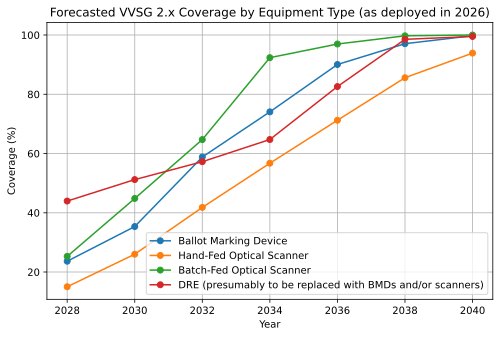

In [283]:
# plot lines from 2028 to 2040 by equipment type
plt.figure(figsize=(8, 5))
for eq_type in coverage_by_year_and_type.columns[:4]:
    plt.plot(coverage_by_year_and_type.index, coverage_by_year_and_type[eq_type], '-o', label=eq_type)
plt.title("Forecasted VVSG 2.x Coverage by Equipment Type (as deployed in 2026)")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
L=plt.legend()
DRE_index = ['DRE' in i.get_text() for i in list(L.get_texts())].index(True)
L.get_texts()[DRE_index].set_text('DRE (presumably to be replaced with BMDs and/or scanners)')
plt.grid()
plt.show()

In [290]:
df[(df['Year'] == 2026) & (df['Equipment Type'] == 'DRE')]['State'].value_counts(normalize=True)

State
Wisconsin     0.338164
Louisiana     0.309179
Indiana       0.135266
Tennessee      0.10628
Texas         0.043478
Ohio          0.028986
Nevada         0.02657
Illinois      0.004831
Alaska        0.002415
New Jersey    0.002415
Utah          0.002415
Name: proportion, dtype: Float64

In [291]:
df['Equipment Type'].value_counts(normalize=True)

Equipment Type
Hand-Fed Optical Scanner      0.34939
Ballot Marking Device        0.332555
DRE                          0.184163
Batch-Fed Optical Scanner     0.09679
Hybrid Optical Scan/BMD      0.028953
Hybrid Optical Scan/DRE      0.004826
Mechanical Lever Machine     0.002094
Hybrid BMD/Tabulator         0.000981
Punch Card Voting System     0.000249
Name: proportion, dtype: Float64

I don't think we'll be using this analysis, but here's the methods section I wrote for it anyway.

>Knowing the distribution of retirement ages by equipment type (described above) enabled us to forecast the future replacement of equipment. We determined the probability that a piece of voting equipment gets replaced by a certain age (e.g., the historical probability that a BMD is replaced after its 10th year in use). Then we took the fleet of voting equipment that the dataset indicates will be deployed in 2026, and ran a forward simulation of federal election years through 2040. Each year, equipment had the previously-determined probability of being replaced. However, we set a ceiling on the allowable age of the equipment: if the age of the equipment was above the age at which 95% of that equipment has been historically replaced, we had it replaced in the simulation. 